In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.datasets import load_breast_cancer

### Loading the dataset

In [5]:
cancer = load_breast_cancer()


### Dataframing it and previewing

In [9]:
df = pd.DataFrame(cancer['data'], columns = cancer['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Scaling

In [13]:
#we have 30 dimensions/features here which is too many to be run by selective ML models and performance would be worse
#so, we scale it down to be included in dimensionality reduction
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [14]:
#fitting
scaler.fit(df)

StandardScaler()

In [16]:
#transforming
scaler_df = scaler.transform(df)

### PCA 

In [22]:
#now comes the main part..
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)

In [23]:
pca.fit(scaler_df)

PCA(n_components=2)

In [24]:
pca_df = pca.transform(scaler_df)

In [25]:
scaler_df.shape

(569, 30)

In [26]:
pca_df.shape

(569, 2)

#### in the above it's seen a drastic amount of features got reduced to just 2 features! 

### Plotting

Text(0.5, 1.0, 'PCA visualization of BREast Cancer dataset')

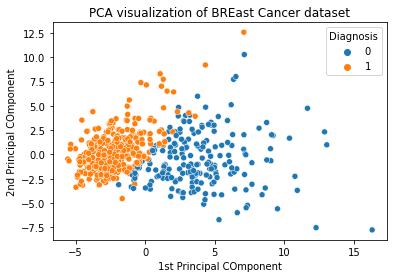

In [48]:

sns.scatterplot(x = pca_df[:,0], y = pca_df[:,1], hue = cancer['target'], cmap = 'cividis')

plt.xlabel('1st Principal COmponent')
plt.ylabel('2nd Principal COmponent')

plt.legend(title='Diagnosis')


plt.title("PCA visualization of BREast Cancer dataset")



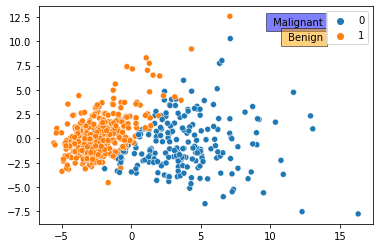

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=pca_df[:, 0], y=pca_df[:, 1], hue=cancer['target'], cmap='cividis')

# Add labels for categories
plt.text(0.85, 0.95, ' Malignant', transform=plt.gca().transAxes, ha='right', va='top', bbox=dict(facecolor='blue', alpha=0.5))
plt.text(0.85, 0.88, ' Benign', transform=plt.gca().transAxes, ha='right', va='top', bbox=dict(facecolor='orange', alpha=0.5))

plt.show()


###  Now it will be easy to implement any ML models starting from regression to classification and find out if it's malignant or benign